<a href="https://colab.research.google.com/github/shemi024/regression-correlation/blob/main/ml2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
data= pd.read_csv('/content/drive/MyDrive/flights.csv')

In [ ]:
data.shape

(144, 3)

In [ ]:
data.head()

,year,month,passengers
0,1949,January,112
1,1949,February,118
2,1949,March,132
3,1949,April,129
4,1949,May,121


In [ ]:
data.isna().sum()

year          0
month         0
passengers    0
dtype: int64

In [ ]:
data.month.nunique()

12

In [ ]:
data.drop('month',axis=1,inplace=True)

In [ ]:
data=pd.get_dummies(data)

In [ ]:
data.head

<bound method NDFrame.head of      year  passengers
0    1949         112
1    1949         118
2    1949         132
3    1949         129
4    1949         121
..    ...         ...
139  1960         606
140  1960         508
141  1960         461
142  1960         390
143  1960         432

[144 rows x 2 columns]>

In [ ]:
#spliting the dataset
x=data.drop(['passengers'],axis=1)
y=data['passengers']


In [ ]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test =train_test_split(x,y, random_state=42, test_size=0.2)

In [ ]:
x_train.shape

(115, 1)

In [ ]:
data.dtypes

year          int64
passengers    int64
dtype: object

In [ ]:
#Logistic regression
from sklearn.linear_model import LogisticRegression
logis_model = LogisticRegression()
model=logis_model.fit(x_train, y_train)
y_pred = model.predict(x_test)

In [ ]:
from sklearn.metrics import confusion_matrix,accuracy_score,precision_score,recall_score,f1_score
print("Accuracy is:", accuracy_score(y_test, y_pred))
print("precision is:",precision_score(y_test, y_pred,average='micro'))
print("recall is:",recall_score(y_test, y_pred,average='micro'))
print("f1 score is:",f1_score(y_test, y_pred,average='micro'))

Accuracy is: 0.0
precision is: 0.0
recall is: 0.0
f1 score is: 0.0


In [ ]:

confusion_matrix(y_test, y_pred)

array([[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 1, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 1, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 1, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 1, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 1, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 2, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 1, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 1, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 1, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 

In [ ]:
from sklearn import neighbors
#KNN
from sklearn.neighbors import KNeighborsClassifier
acc_values=[]
neighbors = np.arange(2,7)
for k in neighbors:
  classifier =KNeighborsClassifier(n_neighbors=k, metric='minkowski')
  classifier.fit(x_train, y_train)
  y_pred = classifier.predict(x_test)
  acc = accuracy_score(y_test, y_pred)
  acc_values.append(acc)

In [ ]:
acc_values

[0.0, 0.0, 0.0, 0.0, 0.0]

Text(0, 0.5, 'accuracy')

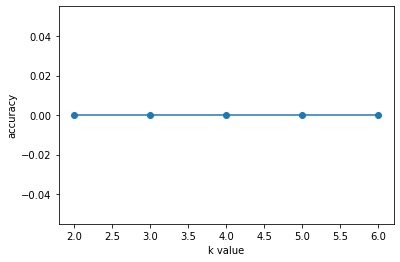

In [ ]:
#we plot the graph between the k-value(neighbor value) and acc_value
plt.plot(neighbors, acc_values,'o-')
plt.xlabel('k value')
plt.ylabel('accuracy')

In [ ]:
#replace our k-values with 5
classifier =KNeighborsClassifier(n_neighbors=3, metric='minkowski')
classifier.fit(x_train, y_train)
y_pred = classifier.predict(x_test)
print("Accuracy is:", accuracy_score(y_test, y_pred,))
print("precision is:",precision_score(y_test, y_pred,average='micro'))
print("recall is:",recall_score(y_test, y_pred,average='micro'))
print("f1 score is:",f1_score(y_test, y_pred,average='micro'))

Accuracy is: 0.0
precision is: 0.0
recall is: 0.0
f1 score is: 0.0


In [ ]:
confusion_matrix(y_test, y_pred)

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [1, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]])

In [ ]:
data.describe()

,year,passengers
count,144.000000,144.000000
mean,1954.500000,280.298611
std,3.464102,119.966317
min,1949.000000,104.000000
25%,1951.750000,180.000000
50%,1954.500000,265.500000
75%,1957.250000,360.500000
max,1960.000000,622.000000


In [ ]:
#the above table values have different ranges
#standard scaling
from sklearn.preprocessing import StandardScaler
scaler= StandardScaler()
x_train = scaler.fit_transform(x_train)
x_test=scaler.fit_transform(x_test)

In [ ]:
#Logistic regression
from sklearn.linear_model import LogisticRegression
logis_model = LogisticRegression()
logis_model.fit(x_train, y_train)
y_pred = logis_model.predict(x_test)

In [ ]:
logis_model = LogisticRegression()
logis_model.fit(x_train, y_train)
y_pred = logis_model.predict(x_test)

In [ ]:
print("Accuracy is:", accuracy_score(y_test, y_pred,))
print("precision is:",precision_score(y_test, y_pred,average='micro'))
print("recall is:",recall_score(y_test, y_pred,average='micro'))
print("f1 score is:",f1_score(y_test, y_pred,average='micro'))

Accuracy is: 0.0
precision is: 0.0
recall is: 0.0
f1 score is: 0.0


In [ ]:
confusion_matrix(y_test, y_pred)

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 1, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 1, 0]])

In [ ]:
acc_values=[]
neighbors = np.arange(1,6)
for k in neighbors:
  classifier =KNeighborsClassifier(n_neighbors=k, metric='minkowski')
  classifier.fit(x_train, y_train)
  y_pred = classifier.predict(x_test)
  acc = accuracy_score(y_test, y_pred)
  acc_values.append(acc)

Text(0, 0.5, 'accuracy')

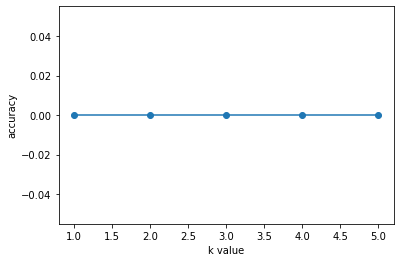

In [ ]:
#we plot the graph between the k-value(neighbor value) and acc_value
plt.plot(neighbors, acc_values,'o-')
plt.xlabel('k value')
plt.ylabel('accuracy')

In [ ]:

classifier =KNeighborsClassifier(n_neighbors=5, metric='minkowski')
classifier.fit(x_train, y_train)
y_pred = classifier.predict(x_test)



In [ ]:
print("Accuracy is:", accuracy_score(y_test, y_pred,))
print("precision is:",precision_score(y_test, y_pred,average='micro'))
print("recall is:",recall_score(y_test, y_pred,average='micro'))
print("f1 score is:",f1_score(y_test, y_pred,average='micro'))

Accuracy is: 0.0
precision is: 0.0
recall is: 0.0
f1 score is: 0.0


In [ ]:

confusion_matrix(y_test, y_pred)

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [1, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]])

In [ ]:
#SVM 
#linear classifier
from sklearn.svm import SVC

In [ ]:
svm_linear =SVC(kernel='linear')

In [ ]:
svm_linear.fit(x_train, y_train)

SVC(kernel='linear')

In [ ]:
y_pred = svm_linear.predict(x_test)

In [ ]:
print("Accuracy using linear svm is",accuracy_score(y_test,y_pred))

Accuracy using linear svm is 0.034482758620689655


In [ ]:
#to make running code fast standardizing the features
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
x_train = sc.fit_transform(x_train)
x_test = sc.fit_transform(x_test)
svm_linear = SVC(kernel='linear')
svm_linear.fit(x_train,y_train)
y_pred =svm_linear.predict(x_test)
print("Accuracy using linear svm is",accuracy_score(y_test,y_pred))

Accuracy using linear svm is 0.034482758620689655


In [ ]:
from pandas._libs.hashtable import StringVector
#polynomial svm
svm_poly = SVC(kernel='poly',degree=5)
svm_poly.fit(x_train,y_train)
y_pred = svm_poly.predict(x_test)
print('Accuracy is',accuracy_score(y_test,y_pred))

Accuracy is 0.0
